
# HW3: Simple Linear Regression with Sacramento Real Estate Data

---

In this HW you will apply your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

**You are expected to create and enter MULTIPLE relevant cells in each part.**   
**Explain with markdown cells any reason that support your finding or action.**   
**Points may be deducted if no appropriate interpretation is provided.**

*you may download the dataset used in this HW from here: 1RW87ZmENMHrS8K9iPPwmnHfYxmb-w0Qr*


### 1. Read in the Sacramento housing data set.

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.6MB/s 


In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'17HbHBVlcAsqs0Yi7IGnZAt5u2-sl9B7L'}) # replace the id with id of file you want to access
downloaded.GetContentFile('drug-use-by-age.csv') 
downloaded = drive.CreateFile({'id':'1RW87ZmENMHrS8K9iPPwmnHfYxmb-w0Qr'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sacramento_real_estate_transactions.csv')


In [0]:
sac_csv = 'sacramento_real_estate_transactions.csv'

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis (EDA) on this data set. 

**Show how you exolore this dataset     
Explain any steps you take to clean/transform your data.   
Do not transform your data without any reasoning.
need to explain why you do it**

In [0]:
# A:
# In this section, we will firstexplore the dataset, and then clean & transform the data.

housing = pd.read_csv('sacramento_real_estate_transactions.csv')
housing.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


**Check how many rows and columns in total so we know the size of the data:**

In [0]:
housing.shape

(985, 12)

**Check the features in the table so we can see all the column  names:**

In [0]:
housing.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

**Check the data type so we know how to proceed with cleaning and transforming the dataset later:**

In [0]:
housing.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

**I noticed zip is an integer but it should not be numeric. So I converted it to a string.**

In [0]:
#Convert zip to string
housing['zip']=housing['zip'].astype(str)

**Check for the summary statistics:**

In [0]:
housing.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


**The result has some unusual data. Minimum shows there are houses with 0 beds and 0 baths. Also, there are square feet and price with negative values.**

**Next, I will investigate these unusual values.**



**First I will find all beds = 0:**

In [0]:
housing[housing['beds']==0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


**In above data, we can see both bedrooms and bathrooms are 0. Since there are over 100 houses which don't have bedroom and bathroom, it is too many to be data entry mistake. I assume they are just land and haven't been built anything yet. So I will keep these data**

**Then I will check all the negative values for price and square feet**

In [0]:
housing[housing['price']<0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [0]:
housing[housing['sq__ft']<0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


**I found a data entry issue. The state was entered improperly as "AC". Thus, I decide to drop this data.**

In [0]:
housing.drop(703, inplace=True)

### 3. Our goal will be to predict the price. List variables that you think qualify as predictors of price in a SLR model. 

**For EACH of these variables you believe to be valid potential predictors in an SLR model, generate a sns.lmplot showing the relationship between the the feature variable and target variable.**

** Potential predictors in an SLR model are:  **



*   Beds
*   Baths
*   Sq__ft



**Sns plot for the relationship between Beds and Price:**



In [0]:
# A price is the target, others are features. Our goal is to find the best feature
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

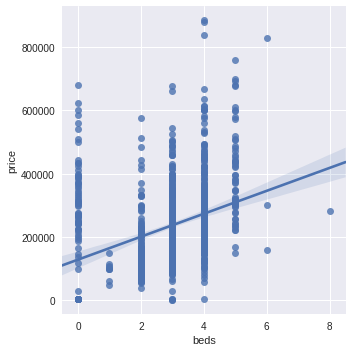

In [0]:
sns.lmplot(x='beds', y='price', data=housing)
plt.show()

**Housing price increases as the number of beds increases. Note: number of beds is a discrete number**

**Sns plot for the relationship between Baths and Price:**

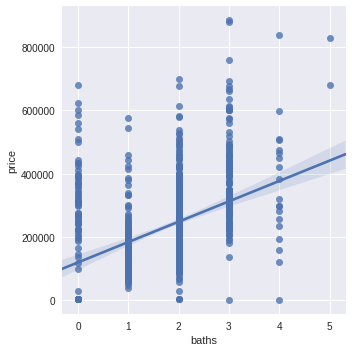

In [0]:
sns.lmplot(x='baths', y='price', data=housing)
plt.show()

**Housing price increases as the number of baths increases. Note: number of baths is a discrete number**

**Sns plot for the  relationship between Sq__ft and Price:**

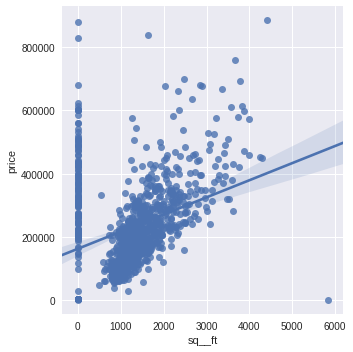

In [0]:
sns.lmplot(x='sq__ft', y='price', data=housing)
plt.show()

**Not counting the unfinished housing (square feet =0), price increases when square feet increases.**

### 4. Which SINGLE variable would be the best predictor of Y in a SLR model? Why?

Sq__ft is a better predictor than beds and baths because sq__ft is continuous while beds and baths are discrete values. Nevertheless, there is probably strong correlation between beds/ baths and sqr_ft. This trend will be stronger if we remove the 0 value data in beds and baths.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**
- **Report its score.**

In [0]:
# Test your function on price and the variable you determined was the best predictor in Problem 4.
#create X and y
featyre_col = ['sq__ft']
X = housing[featyre_col]
y=housing.price

Check X's shape:

In [0]:
print(X.shape)

(984, 1)


Check y's shape:

In [0]:
print(y.shape)

(984,)


<a id="scikit-learns--step-modeling-pattern"></a>
### scikit-learn's Five-Step Modeling Pattern

**Step 1:** Import the class.

In [0]:
from sklearn.linear_model import LinearRegression

**Step 2:** "Instantiate" the "estimator."

In [0]:
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

**Step 3:** Fit the model with data (aka "model training").

In [0]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Step 4:** Predict the response for a new observation.

In [0]:
lr.predict(np.array([836]).reshape(1,-1))

array([208213.31869018])

**Step 5:** Evaluate the trained model.

In [0]:
lr.score(X,y)

0.11146324480165415

**This score is close to 0, so this trained model is not accurate.**



 **Report the slope and intercept**


In [0]:
print('The optimal Y intercept is ',lr.intercept_)
print('The optimal slope is ',lr.coef_)

The optimal Y intercept is  162938.7375609862
The optimal slope is  [54.15619752]


### 6. Interpret the intercept. Interpret the slope.


Intercept is the value of y when all independent variables are 0.  The estimated price is $162938.74when the square feet is 0 

Slope is an increase of 1 sq__ft is associated with increasing the housing price by $54.16

### 7. Give a real life example of how this model could help people in prediction. Also give an example that the model can be used for inference purpose. You should consider non-technical people as users in your example.

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

**Real life example**

A real estate agent wants to estimate how the square feet affect the housing price in Sacramento area based on this model using this data

**What can we infer:**

A family want to buy a house. They want to understand what characteristics of a house and what areas are associated with perceived value. They have some hypothesis and they can use the model to test their hypothesis.

### 8: Using the model you came up with in Problem 5, calculate the residuals (MSE) and plot the targets vs. the prediction with the linear regression line.

In [0]:
# A::MSE, RMSE
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y, lr.predict(X)))
print('MSE:', metrics.mean_squared_error(y, lr.predict(X)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, lr.predict(X))))

MAE: 95953.50544511034
MSE: 17010643325.483362
RMSE: 130424.85700771675


Since MSE is so large, this is not good

**Plot the target vs. the prediction with the linear regression line**

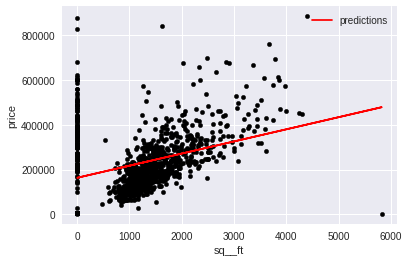

In [0]:
predictions  =  lr.predict(X)
score        =  lr.score(X,y)
housing['predictions'] = predictions

ax1 = housing.plot(kind='scatter',x='sq__ft', y='price', color='black')
housing.plot(kind='line',x='sq__ft', y='predictions', color='red',ax=ax1)

**The scatter plot is actual values and the line is predictions. The vertical distance from the line is the error. The 0 square feet data are houses that were not built**

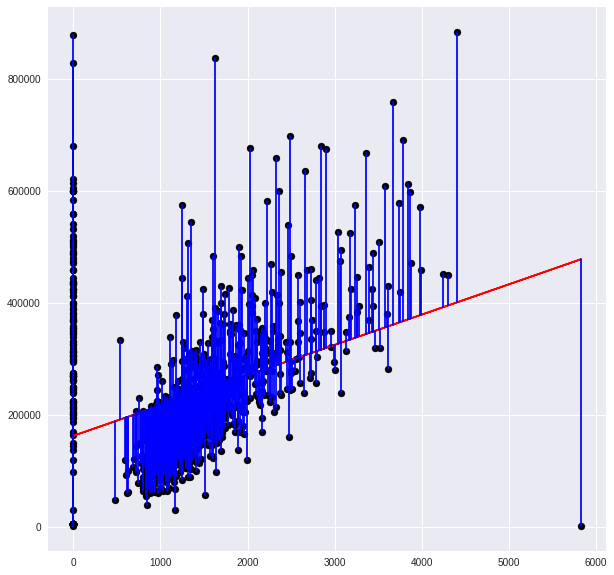

In [0]:
# Plot with residuals
fig = plt.figure(figsize=(10,10))

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= housing['sq__ft'], y=housing['price'], c='k')
ax.plot(housing['sq__ft'], housing['predictions'], color='r');

# iterate over predictions
for _, row in housing.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['predictions']), 'b-')

**Above is residuals plot. **

**Predictions VS True target value**

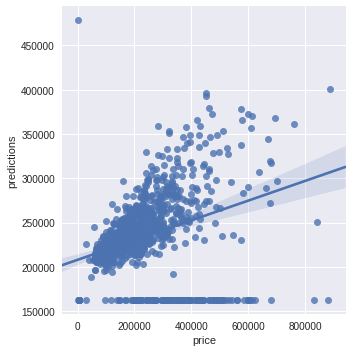

In [0]:
sns.lmplot(x='price', y='predictions', data=housing)

The x-axis shows the actual housing price, while the y-axis is the predicted housing price. As the actual price get larger, the prediction error get larger. The error is mainly due to including houses that were not built (sq__ft = 0). 